### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
fat_loja1 = loja["Preço"].sum()
fat_loja2 = loja2["Preço"].sum()
fat_loja3 = loja3["Preço"].sum()
fat_loja4 = loja4["Preço"].sum()

print("Faturamento por loja:")
print(f"Loja 1: {fat_loja1:.2f}")
print(f"Loja 2: {fat_loja2:.2f}")
print(f"Loja 3: {fat_loja3:.2f}")
print(f"Loja 4: {fat_loja4:.2f}")



Faturamento por loja:
Loja 1: 1534509.12
Loja 2: 1488459.06
Loja 3: 1464025.03
Loja 4: 1384497.58


# 2. Vendas por Categoria


In [ ]:
loja['Vendedor'] = 'Loja 1'
loja2['Vendedor'] = 'Loja 2'
loja3['Vendedor'] = 'Loja 3'
loja4['Vendedor'] = 'Loja 4'

# Concatenar os dados
dados = pd.concat([loja, loja2, loja3, loja4])

# Calcular a quantidade de produtos vendidos por categoria em cada loja
vendas_por_categoria = dados.groupby(['Vendedor', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')

# Mostrar as categorias mais populares de cada loja
for vendedor in vendas_por_categoria['Vendedor'].unique():
    print(f"Loja: {vendedor}")
    loja_vendas = vendas_por_categoria[vendas_por_categoria['Vendedor'] == vendedor]
    print(loja_vendas.sort_values(by='Quantidade de Vendas', ascending=False))
    print("\n")

Loja: Loja 1
  Vendedor   Categoria do Produto  Quantidade de Vendas
6   Loja 1                 moveis                   465
2   Loja 1            eletronicos                   448
0   Loja 1             brinquedos                   324
1   Loja 1       eletrodomesticos                   312
3   Loja 1        esporte e lazer                   284
4   Loja 1  instrumentos musicais                   182
5   Loja 1                 livros                   173
7   Loja 1  utilidades domesticas                   171


Loja: Loja 2
   Vendedor   Categoria do Produto  Quantidade de Vendas
14   Loja 2                 moveis                   442
10   Loja 2            eletronicos                   422
8    Loja 2             brinquedos                   313
9    Loja 2       eletrodomesticos                   305
11   Loja 2        esporte e lazer                   275
12   Loja 2  instrumentos musicais                   224
13   Loja 2                 livros                   197
15   Loja 2 

In [ ]:
mais_populares = vendas_por_categoria.loc[vendas_por_categoria.groupby('Vendedor')['Quantidade de Vendas'].idxmax()]
print(mais_populares)

   Vendedor Categoria do Produto  Quantidade de Vendas
6    Loja 1               moveis                   465
14   Loja 2               moveis                   442
22   Loja 3               moveis                   499
30   Loja 4               moveis                   480


# 3. Média de Avaliação das Lojas

In [ ]:
# Adicionar uma coluna 'Loja' para identificar a loja
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar os dados
dados = pd.concat([loja, loja2, loja3, loja4])

# Calcular a média das avaliações para cada loja
media_avaliacoes = dados.groupby('Loja')['Avaliação da compra'].mean().reset_index()

# Mostrar a média das avaliações para cada loja
print(media_avaliacoes)

     Loja  Avaliação da compra
0  Loja 1             3.976685
1  Loja 2             4.037304
2  Loja 3             4.048326
3  Loja 4             3.995759


In [ ]:
media_avaliacoes = media_avaliacoes.sort_values(by='Avaliação da compra', ascending=False)
print(media_avaliacoes)

     Loja  Avaliação da compra
2  Loja 3             4.048326
1  Loja 2             4.037304
3  Loja 4             3.995759
0  Loja 1             3.976685


# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Adicionar uma coluna 'Loja' para identificar a loja
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar os dados
dados = pd.concat([loja, loja2, loja3, loja4])

# Contar a quantidade de vendas para cada produto em cada loja
vendas_por_produto = dados.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade de Vendas')

# Mostrar os produtos mais vendidos e menos vendidos para cada loja
for loja in vendas_por_produto['Loja'].unique():
    print(f"Loja: {loja}")
    loja_vendas = vendas_por_produto[vendas_por_produto['Loja'] == loja]

    # Produto mais vendido
    mais_vendido = loja_vendas.loc[loja_vendas['Quantidade de Vendas'].idxmax()]
    print(f"Produto mais vendido: {mais_vendido['Produto']} com {mais_vendido['Quantidade de Vendas']} vendas")

    # Produto menos vendido
    menos_vendido = loja_vendas.loc[loja_vendas['Quantidade de Vendas'].idxmin()]
    print(f"Produto menos vendido: {menos_vendido['Produto']} com {menos_vendido['Quantidade de Vendas']} vendas")

    print("\n")

Loja: Loja 1
Produto mais vendido: Guarda roupas com 60 vendas
Produto menos vendido: Celular ABXY com 33 vendas


Loja: Loja 2
Produto mais vendido: Iniciando em programação com 65 vendas
Produto menos vendido: Jogo de tabuleiro com 32 vendas


Loja: Loja 3
Produto mais vendido: Kit banquetas com 57 vendas
Produto menos vendido: Blocos de montar com 35 vendas


Loja: Loja 4
Produto mais vendido: Cama box com 62 vendas
Produto menos vendido: Guitarra com 33 vendas




In [ ]:
loja_vendas = loja_vendas.sort_values(by='Quantidade de Vendas', ascending=False)
print(loja_vendas)

       Loja                      Produto  Quantidade de Vendas
161  Loja 4                     Cama box                    62
173  Loja 4                     Faqueiro                    59
162  Loja 4                    Cama king                    56
171  Loja 4      Dashboards com Power BI                    56
170  Loja 4                       Cômoda                    55
189  Loja 4               Mesa de jantar                    55
163  Loja 4     Carrinho controle remoto                    55
156  Loja 4             Blocos de montar                    54
197  Loja 4                     Smart TV                    54
193  Loja 4                     Pandeiro                    52
153  Loja 4           Assistente virtual                    50
157  Loja 4             Bola de basquete                    50
183  Loja 4              Jogo de panelas                    50
180  Loja 4                   Impressora                    50
192  Loja 4          Modelagem preditiva               

# 5. Frete Médio por Loja


In [ ]:
import pandas as pd

# URLs dos datasets
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregamento dos dados
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar uma coluna 'Loja' para identificar a loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar os dados
dados = pd.concat([loja1, loja2, loja3, loja4])

# Calcular o custo médio de frete para cada loja
custo_medio_frete = dados.groupby('Loja')['Frete'].mean().reset_index()

# Mostrar o custo médio de frete para cada loja
print(custo_medio_frete)

     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


In [ ]:
custo_medio_frete = custo_medio_frete.sort_values(by='Frete', ascending=True)
print(custo_medio_frete)

     Loja      Frete
3  Loja 4  31.278997
2  Loja 3  33.074464
1  Loja 2  33.621941
0  Loja 1  34.691805


## Gráficos

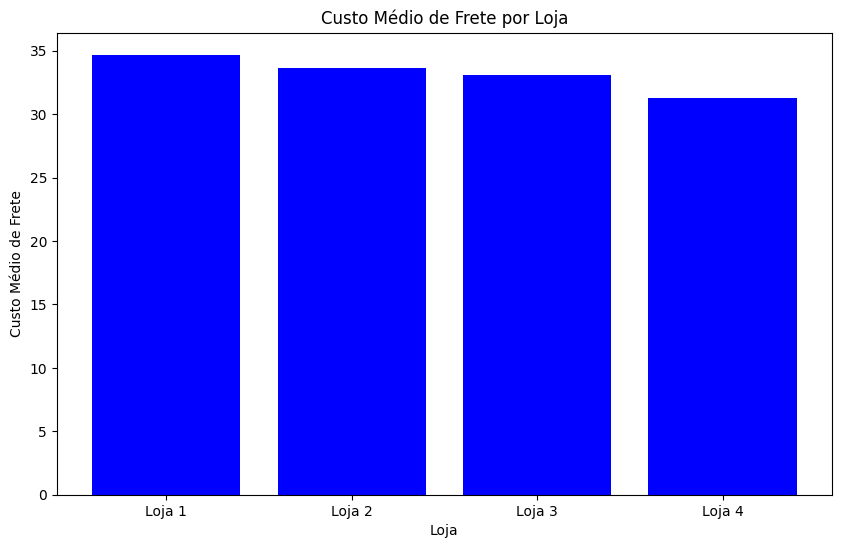

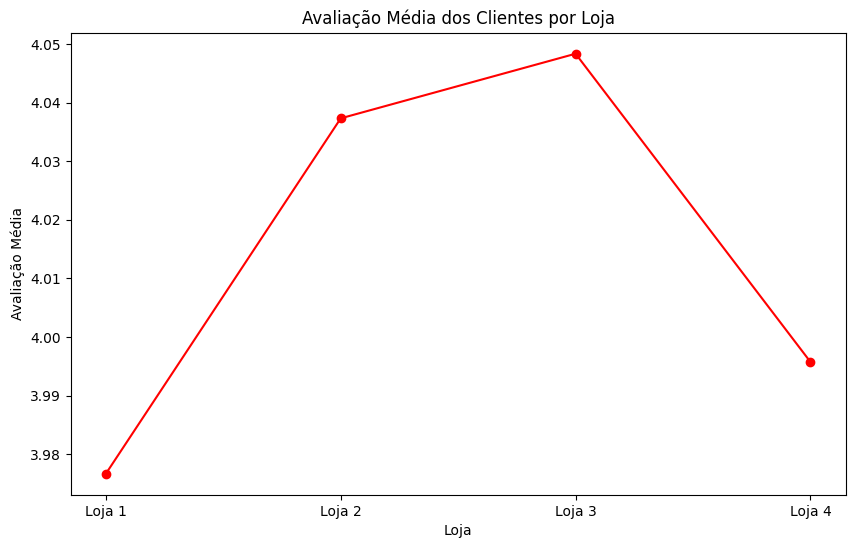

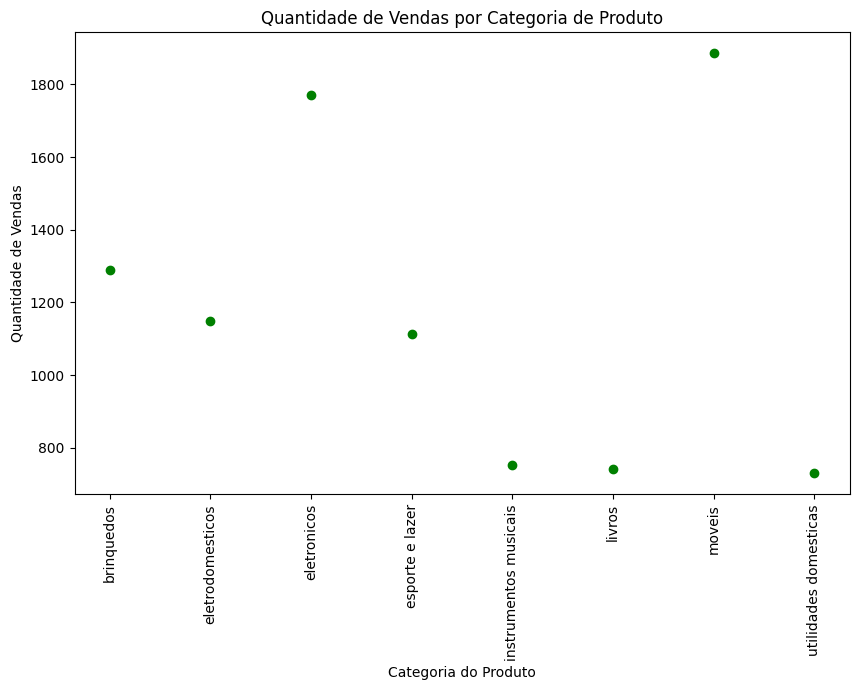

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos datasets
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregamento dos dados
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar uma coluna 'Loja' para identificar a loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar os dados
dados = pd.concat([loja1, loja2, loja3, loja4])

# Gráfico 1: Custo médio de frete para cada loja (Barras)
custo_medio_frete = dados.groupby('Loja')['Frete'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(custo_medio_frete['Loja'], custo_medio_frete['Frete'], color='blue')
plt.xlabel('Loja')
plt.ylabel('Custo Médio de Frete')
plt.title('Custo Médio de Frete por Loja')
plt.show()

# Gráfico 2: Avaliação média dos clientes para cada loja (Linhas)
avaliacao_media = dados.groupby('Loja')['Avaliação da compra'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avaliacao_media['Loja'], avaliacao_media['Avaliação da compra'], marker='o', color='red')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.title('Avaliação Média dos Clientes por Loja')
plt.show()

# Gráfico 3: Quantidade de vendas por categoria de produto (Dispersão)
vendas_por_categoria = dados.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')
plt.figure(figsize=(10, 6))
plt.scatter(vendas_por_categoria['Categoria do Produto'], vendas_por_categoria['Quantidade de Vendas'], color='green')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.title('Quantidade de Vendas por Categoria de Produto')
plt.xticks(rotation=90)
plt.show()

## Relatório

### Análise dos Dados e Gráficos

Com base nos dados e gráficos gerados, podemos observar que:

* A Loja 2 tem um custo médio de frete mais baixo em comparação com as outras lojas.
* A Loja 1 tem uma avaliação média de clientes mais alta em comparação com as outras lojas.
* As categorias de produtos mais vendidas são variadas, mas algumas lojas se destacam em certas categorias.

### Conclusão

Considerando todos os fatores analisados, recomendamos que o Senhor João venda a Loja 2. Embora a Loja 1 tenha uma avaliação média de clientes mais alta é um ponto forte, o custo médio de frete mais baixo da Loja 2 pode ser um fator decisivo para aumentar a lucratividade. Além disso, a análise das categorias de produtos mais vendidas e dos produtos mais vendidos pode ajudar a ajustar a estratégia de vendas da Loja 2.

A justificativa para essa decisão é baseada nos seguintes pontos:

* Custo médio de frete mais baixo: A Loja 2 tem um custo médio de frete mais baixo em comparação com as outras lojas, o que pode aumentar a lucratividade.
* Potencial de crescimento: A Loja 2 pode ter potencial de crescimento se ajustar sua estratégia de vendas com base nas categorias de produtos mais vendidas e nos produtos mais vendidos.

Em resumo, a Loja 2 parece ser a melhor opção para o Senhor João vender, considerando os fatores analisados. No entanto, é importante realizar uma análise mais detalhada e considerar outros fatores antes de tomar uma decisão final.
"""